In [3]:
from minigraphs.reduction import MH
from minigraphs.changes import Switch
from minigraphs.callback import LoggingCallback, EarlyStoppingCallback
from minigraphs.inspection import DisplayOptimization
import networkx as nx
import numpy as np
import random 

random.seed(42)

# Functions
functions = {
    'clustering': nx.average_clustering,
    'assortativity': nx.degree_assortativity_coefficient,
}

targets = {
    'clustering': 0.15,
    'assortativity': -0.1,
}

# Generate seed graph
graph = nx.erdos_renyi_graph(100,0.05)

# Instantiate optimizer
max_iterations = 2000
k = 0.002
beta_max = 5000.0
mid = max_iterations/2

def schedule(iteration):
    return beta_max / (1 + np.exp(-k * (iteration - mid)))
    
annealer = MH(
    functions,
    max_iterations=2000,
    callbacks=[
        LoggingCallback(),
        EarlyStoppingCallback(tol=0.01)
    ],
    change=Switch,
    schedule=schedule,
)

annealer.spec_optimize(targets, graph)


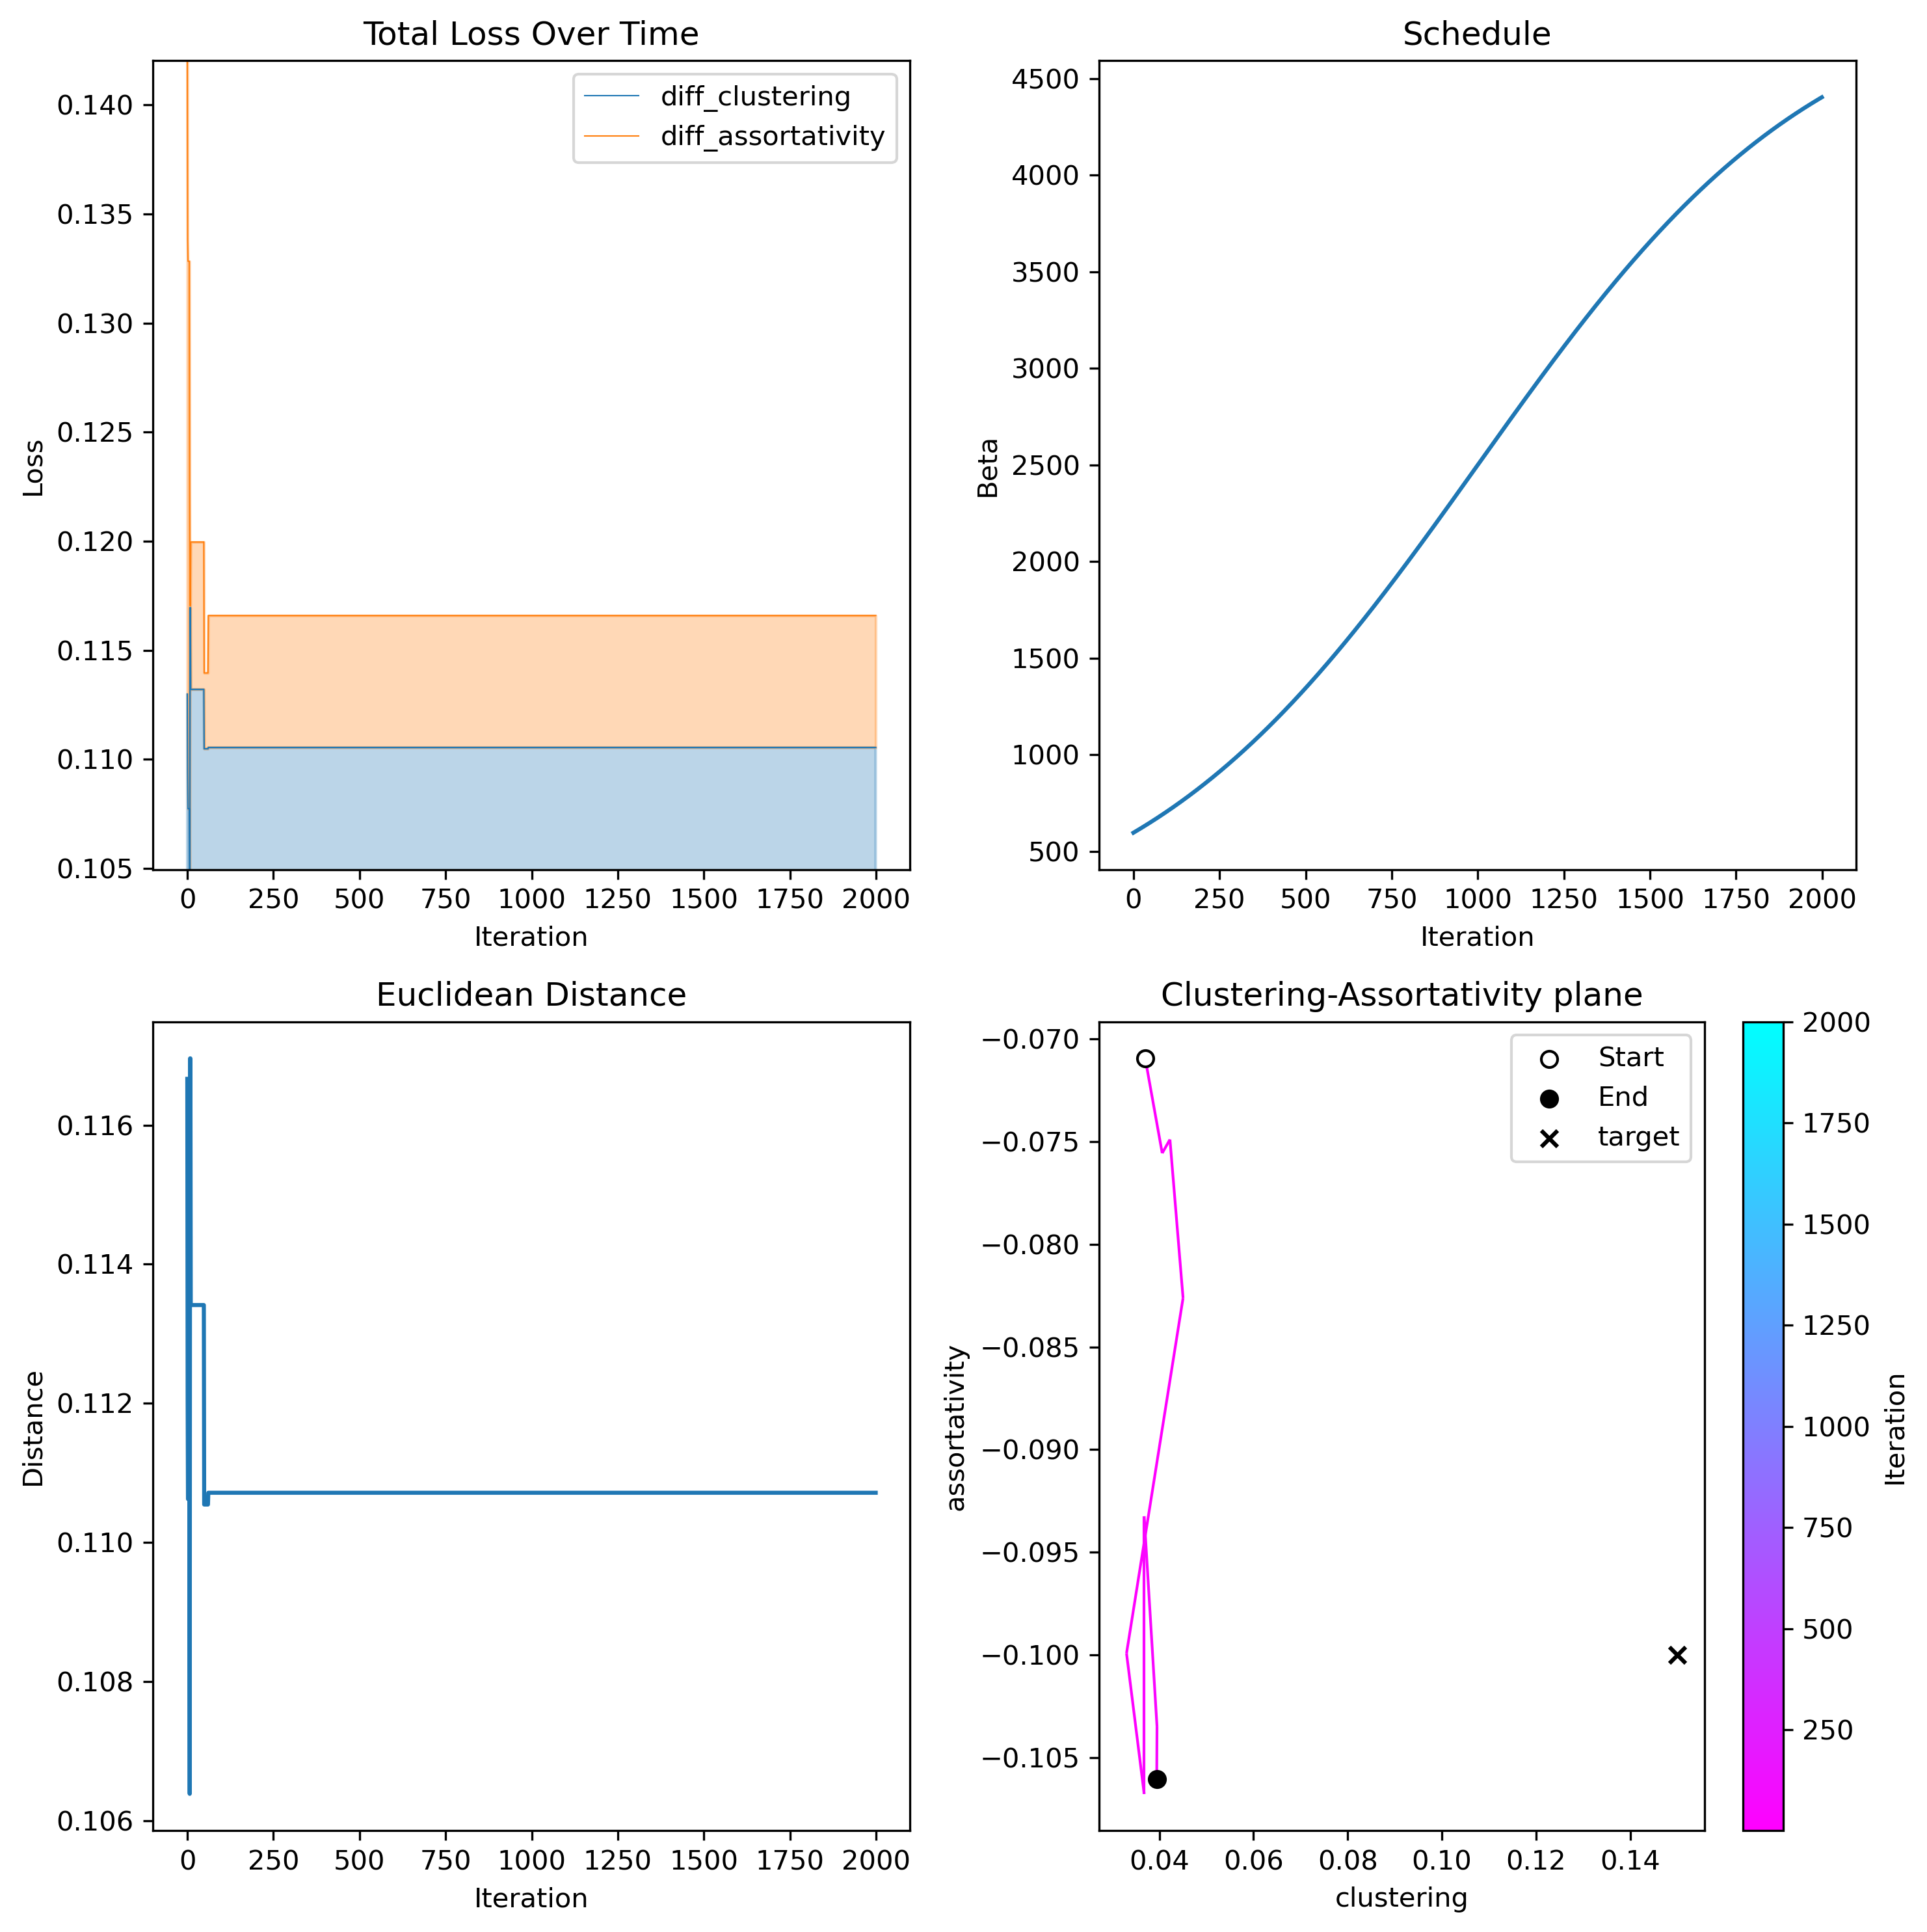

In [2]:
import matplotlib.pyplot as plt

# Process data
df = annealer.log__
disp = DisplayOptimization(df, targets)

fig, axes = plt.subplots(2,2,figsize=(10,10), dpi=300)
disp.loss(axes[0][0])
disp.schedule(axes[0][1])
disp.distance(axes[1][0])
disp.trajectories(['clustering','assortativity'], axes[1][1])

plt.tight_layout()